In [1]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 699.0 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 699.0 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 699.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 610.3 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 610.3 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 519.1 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 519.1 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 599.2 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 599.2 kB/s eta 0:00:01
   -------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Nehu\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer,WordNetLemmatizer
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [4]:
df=pd.read_csv("C:/data/dataset/Reviews.csv")
print("Dataset Preview:\n")
df.head()

Dataset Preview:



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
pd.set_option('display.max_colwidth',None)
df=df['Text']
df.head()

0                                                                                                                                                                                                                                                          I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
1                                                                                                                                                                                                                                                                                                                                   Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to repr

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
doc="Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as 'Jumbo'."

In [15]:
print(doc)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as 'Jumbo'.


In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Nehu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [19]:
tokens=word_tokenize(doc)
print(tokens)

['Product', 'arrived', 'labeled', 'as', 'Jumbo', 'Salted', 'Peanuts', '...', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', '.', 'Not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', "'Jumbo", "'", '.']


In [20]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting wordcloud




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Nehu\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [24]:
from wordcloud import WordCloud

In [26]:
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(doc)

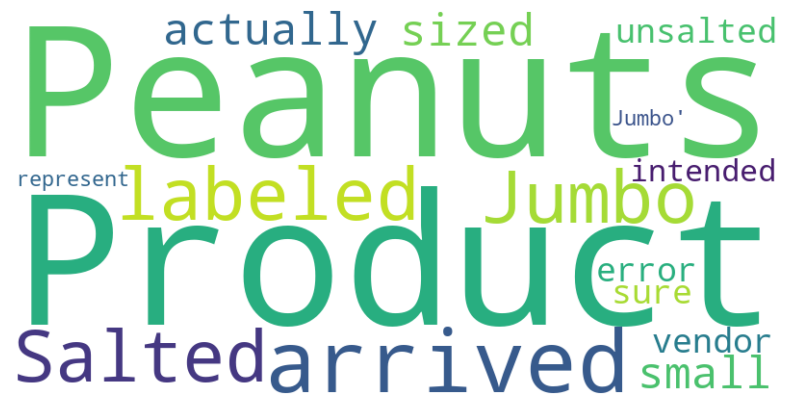

In [27]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Nehu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [30]:
pos_tags=pos_tag(tokens)
print(pos_tags)

[('Product', 'NNP'), ('arrived', 'VBD'), ('labeled', 'VBN'), ('as', 'IN'), ('Jumbo', 'NNP'), ('Salted', 'NNP'), ('Peanuts', 'NNP'), ('...', ':'), ('the', 'DT'), ('peanuts', 'NNS'), ('were', 'VBD'), ('actually', 'RB'), ('small', 'JJ'), ('sized', 'VBN'), ('unsalted', 'JJ'), ('.', '.'), ('Not', 'RB'), ('sure', 'JJ'), ('if', 'IN'), ('this', 'DT'), ('was', 'VBD'), ('an', 'DT'), ('error', 'NN'), ('or', 'CC'), ('if', 'IN'), ('the', 'DT'), ('vendor', 'NN'), ('intended', 'VBN'), ('to', 'TO'), ('represent', 'VB'), ('the', 'DT'), ('product', 'NN'), ('as', 'IN'), ("'Jumbo", 'JJ'), ("'", 'POS'), ('.', '.')]


In [31]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nehu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nehu\AppData\Roaming\nltk_data...


True

In [32]:
stop_words=set(stopwords.words('english'))
print(stop_words)

{'below', 'having', "you're", 'how', "she's", 'from', 'on', "it'd", 'between', 'his', 'theirs', "hasn't", 'to', 'needn', 'yourself', 'mightn', 'was', 'didn', 'they', 'what', 'hers', 'don', "they're", 'under', 'did', 'he', 'them', "he's", 'off', "we'll", 'down', "he'll", "wouldn't", 'that', 'it', 'me', "it'll", 'too', 'nor', 'the', 'during', "wasn't", "you've", "shan't", 'very', 'once', 'at', 'yourselves', 'i', 'those', "weren't", 'few', 'where', 'why', 'itself', 'through', 'while', 'other', 'about', 'more', 'over', "hadn't", "i'll", 'their', 'in', 's', 'of', 'doesn', "don't", 'as', 'her', "needn't", 'o', 'll', 'ourselves', 'out', 'wasn', 'such', 'haven', 'couldn', "doesn't", 'herself', 'most', 'aren', 'isn', 'will', 'am', 'hadn', 'further', 'him', 'some', 'had', "they'll", 'ours', 'when', 'your', 'just', "that'll", 'we', "isn't", 'm', 'hasn', 'this', "couldn't", 'now', 'shouldn', 'because', 'is', 'were', 'same', "i've", 'own', 've', "they'd", 'weren', 'ma', 'who', 're', 'if', 'not', 'e

In [33]:
filtered_tokens=[word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)

['Product', 'arrived', 'labeled', 'Jumbo', 'Salted', 'Peanuts', '...', 'peanuts', 'actually', 'small', 'sized', 'unsalted', '.', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', "'Jumbo", "'", '.']


In [36]:
stemmer=PorterStemmer()
stemmed_tokens=[stemmer.stem(word) for word in filtered_tokens]
print(stemmed_tokens)

['product', 'arriv', 'label', 'jumbo', 'salt', 'peanut', '...', 'peanut', 'actual', 'small', 'size', 'unsalt', '.', 'sure', 'error', 'vendor', 'intend', 'repres', 'product', "'jumbo", "'", '.']


In [37]:
lemmatizer=WordNetLemmatizer()
lemmatized_tokens=[lemmatizer.lemmatize(word)for word in filtered_tokens]
print(lemmatized_tokens)

['Product', 'arrived', 'labeled', 'Jumbo', 'Salted', 'Peanuts', '...', 'peanut', 'actually', 'small', 'sized', 'unsalted', '.', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', "'Jumbo", "'", '.']


In [39]:
corpus=[doc]
corpus

["Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as 'Jumbo'."]

In [42]:
vectorizer=TfidfVectorizer()
vectorizer

TfidfVectorizer()

In [43]:
tfidf_matrix=vectorizer.fit_transform(corpus)
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 25 stored elements and shape (1, 25)>

In [44]:
feature_names=vectorizer.get_feature_names_out()
feature_names

array(['actually', 'an', 'arrived', 'as', 'error', 'if', 'intended',
       'jumbo', 'labeled', 'not', 'or', 'peanuts', 'product', 'represent',
       'salted', 'sized', 'small', 'sure', 'the', 'this', 'to',
       'unsalted', 'vendor', 'was', 'were'], dtype=object)

In [48]:
tfidf_score=zip(feature_names,tfidf_matrix.toarray()[0])
print("\nTF-IDF scores:")
for word,score in tfidf_score:
    print(f"{word}:{score:.4f}")



TF-IDF scores:
actually:0.1443
an:0.1443
arrived:0.1443
as:0.2887
error:0.1443
if:0.2887
intended:0.1443
jumbo:0.2887
labeled:0.1443
not:0.1443
or:0.1443
peanuts:0.2887
product:0.2887
represent:0.1443
salted:0.1443
sized:0.1443
small:0.1443
sure:0.1443
the:0.4330
this:0.1443
to:0.1443
unsalted:0.1443
vendor:0.1443
was:0.1443
were:0.1443


In [49]:
from collections import Counter
pos_counts=Counter([pos for pos_,pos in pos_tags])
print("POS frequency:",pos_counts)

POS frequency: Counter({'DT': 5, 'NNP': 4, 'IN': 4, 'JJ': 4, 'VBD': 3, 'VBN': 3, 'NN': 3, 'RB': 2, '.': 2, ':': 1, 'NNS': 1, 'CC': 1, 'TO': 1, 'VB': 1, 'POS': 1})
